In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

random.seed(1)

data = pd.read_csv('random_data_processed0314.csv')

print "Number of samples:", data.shape[0]
print data.dtypes

Number of samples: 54806
BorrCity                              object
BorrState                             object
BorrZip                               object
CDC_City                              object
CDC_State                             object
CDC_Zip                               object
ThirdPartyLender_City                 object
ThirdPartyLender_State                object
GrossApproval                        float64
ApprovalDate                          object
ApprovalFiscalYear                     int64
DeliveryMethod                        object
subpgmdesc                            object
TermInMonths                           int64
ProjectCounty                         object
ProjectState                          object
BusinessType                          object
LoanStatus                            object
ChargeOffDate                         object
GrossChargeOffAmount                 float64
SP500_Yearly_Return                  float64
CPI                           

/Users/soumyapatro/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5,0,u'State Abbreviation')

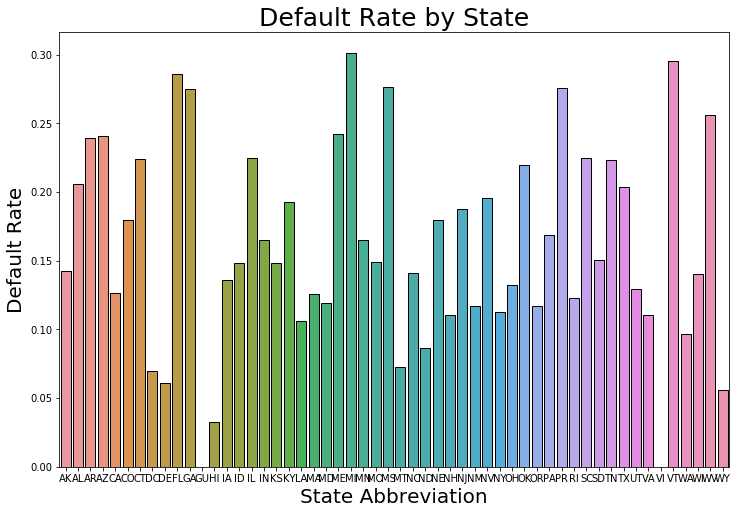

In [109]:
%matplotlib inline

grouped = data[['BorrState','LoanStatus']]
grouped['DefaultRate']=grouped['LoanStatus'].apply(lambda x: 0 if x=='PIF' else 1)
defaultrates = grouped[['BorrState','DefaultRate']].groupby('BorrState').mean().reset_index()
defaultrates.dtypes
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.barplot(x='BorrState',y='DefaultRate',data=defaultrates)
fig.axes.set_title("Default Rate by State",fontsize=25)
fig.set_ylabel("Default Rate",fontsize=20)
fig.set_xlabel("State Abbreviation",fontsize=20)

#defaultrates = grouped[['BorrState','ApprovalFiscalYear','DefaultRate']].groupby(['BorrState','ApprovalFiscalYear']).mean().reset_index()
#defaultrates.pivot('ApprovalFiscalYear','BorrState','DefaultRate')
#sns.heatmap(defaultrates)


/Users/soumyapatro/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,0,u'S&P 500')

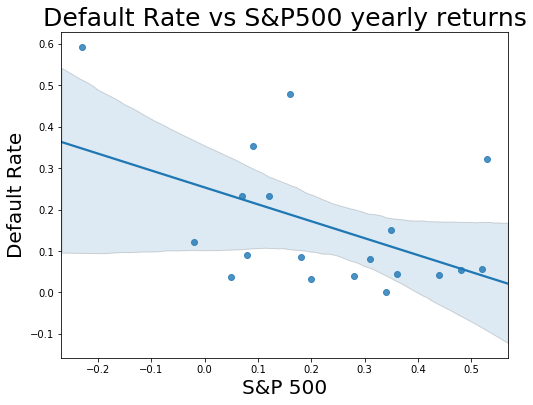

In [108]:
grouped = data[['SP500_Yearly_Return','LoanStatus']]
grouped['DefaultRate']=grouped['LoanStatus'].apply(lambda x: 0 if x=='PIF' else 1)
grouped = grouped.round({'SP500_Yearly_Return' : 2})
defaultrates = grouped[['SP500_Yearly_Return','DefaultRate']].groupby('SP500_Yearly_Return').mean().reset_index()
defaultrates.dtypes
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='SP500_Yearly_Return',y='DefaultRate',data=defaultrates)
fig.axes.set_title("Default Rate vs S&P500 yearly returns",fontsize=25)
fig.set_ylabel("Default Rate",fontsize=20)
fig.set_xlabel("S&P 500",fontsize=20)

/Users/soumyapatro/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,0,u'CPI')

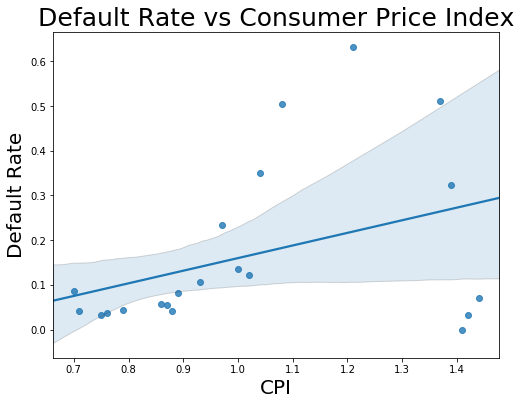

In [107]:
grouped = data[['CPI','LoanStatus']]
grouped['DefaultRate']=grouped['LoanStatus'].apply(lambda x: 0 if x=='PIF' else 1)
grouped = grouped.round({'CPI' : 2})
defaultrates = grouped[['CPI','DefaultRate']].groupby('CPI').mean().reset_index()
defaultrates.dtypes
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='CPI',y='DefaultRate',data=defaultrates)
fig.axes.set_title("Default Rate vs Consumer Price Index",fontsize=25)
fig.set_ylabel("Default Rate",fontsize=20)
fig.set_xlabel("CPI",fontsize=20)

/Users/soumyapatro/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,0,u'Gross Loan Approval')

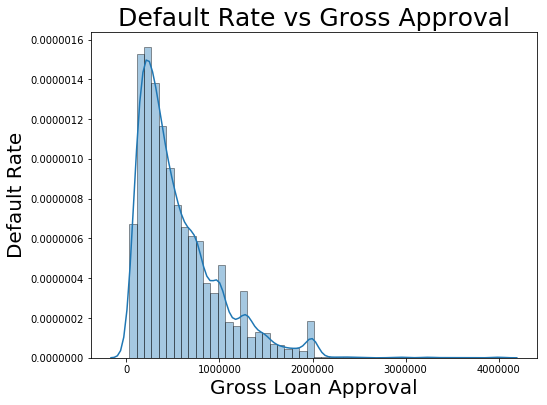

In [105]:
grouped = data[['GrossApproval','LoanStatus']]
grouped['DefaultRate']=grouped['LoanStatus'].apply(lambda x: 0 if x=='PIF' else 1)
grouped = grouped[grouped['DefaultRate']>0]
f, ax = plt.subplots(figsize=(8, 6))
plt.rcParams["patch.force_edgecolor"] = True
fig = sns.distplot(grouped['GrossApproval'])
fig.axes.set_title("Default Rate vs Gross Approval",fontsize=25)
fig.set_ylabel("Default Rate",fontsize=20)
fig.set_xlabel("Gross Loan Approval",fontsize=20)

/Users/soumyapatro/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,0,u'Approval Fiscal Year')

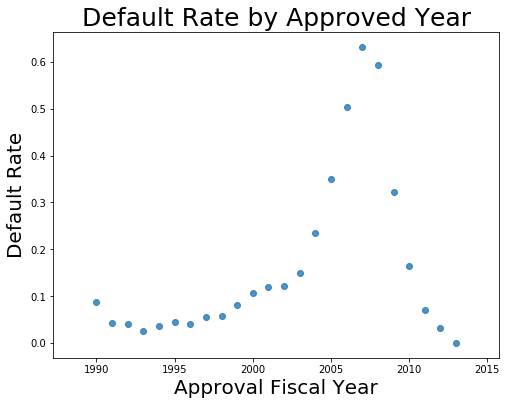

In [106]:
grouped = data[['ApprovalFiscalYear','LoanStatus']]
grouped['DefaultRate']=grouped['LoanStatus'].apply(lambda x: 0 if x=='PIF' else 1)
defaultrates = grouped[['ApprovalFiscalYear','DefaultRate']].groupby('ApprovalFiscalYear').mean().reset_index()
defaultrates.dtypes
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='ApprovalFiscalYear',y='DefaultRate',fit_reg=False,data=defaultrates)
fig.axes.set_title("Default Rate by Approved Year",fontsize=25)
fig.set_ylabel("Default Rate",fontsize=20)
fig.set_xlabel("Approval Fiscal Year",fontsize=20)

/Users/soumyapatro/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


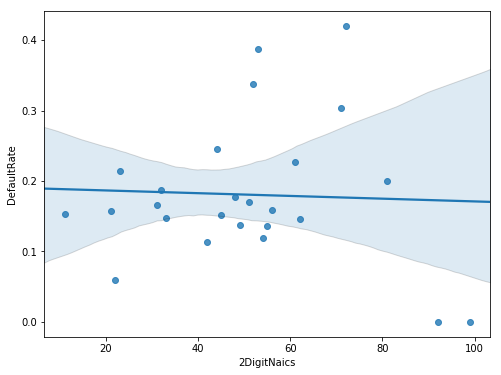

In [93]:
grouped = data[['2DigitNaics','LoanStatus']]
grouped['DefaultRate']=grouped['LoanStatus'].apply(lambda x: 0 if x=='PIF' else 1)
defaultrates = grouped[['2DigitNaics','DefaultRate']].groupby('2DigitNaics').mean().reset_index()
defaultrates = defaultrates[:25]
defaultrates['2DigitNaics'] = defaultrates['2DigitNaics'].astype('str').astype(int)
defaultrates.dtypes
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='2DigitNaics',y='DefaultRate',scatter = True, data=defaultrates)